In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [26]:
df = pd.read_csv('train.csv')

In [27]:
#Antes de mudar formatos

# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remove , and blanks from 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
# #convert to bhp__________________________________________________
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Convert not NaN to float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

# OWNER TYPE __________________________________________________
# Delet blank spaces in 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Check
unique_values = df['owner_type'].unique()
print()
print(unique_values)



# INSURANCE __________________________________________________
#Delet "insurance" 
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Assign value to blank lines
df['insurance'].fillna('No Insurance', inplace=True)

#Blank space on "Third Party" lines
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')

#Remove integer values
df = df[~df['insurance'].astype(str).str.isnumeric()]

#MILEAGE
#assign value to blank lines

#df['mileage'] = df['mileage'].fillna(0)

df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl

        consumo_correto.append(valor)

df['mileage'] = consumo_correto




Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [28]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13510, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13510, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [29]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [30]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [31]:

novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [32]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [33]:
#Delet blanks or NAN 
# KMS __________________________________________________
df = df.dropna(subset=['kms_driven'])
# MAX POWER __________________________________________________
df = df.dropna(subset=['max_power'])
print(df['max_power'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13442, dtype: float64


In [34]:
#Create grupos

# groups max_power


limites = [0, 100, 200, 300, 400, 500, 600]  
rotulos = ['0-100 bhp', '100-200 bhp', '200-300 bhp', '300-400 bhp', '400-500 bhp', '500-600 bhp']

df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)

# groups kms

limites = [0, 50000, 150000, 300000, 600000, 900000, float('inf')]  
rotulos = ['Até 50.000 km', '50.000 km a 150.000 km', '150.000 km a 300.000 km', '300.000 km a 600.000 km', '600.000 km a 900.000 km', 'Acima de 900.000 km']

df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

df.loc[df['kms_driven'] == 1200000, 'kms_group'] = 'Acima de 900.000 km'

# groups engine_capacity

limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

# groups marca

limites = [0, 10, 30, df['resale_price_Lakh'].max()]
rotulos = ['baixa', 'media', 'alta']

df['categoria_marca'] = pd.cut(df.groupby('marca')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)



print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [35]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.17675526726071966
         Diesel: 0.5162176732208367
            CNG: 1.551125004186937
            LPG: 2.8382192219076257
       Electric: 3.271874782846198
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [36]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          baixa: 0.07114150851270024
           alta: 1.5095177996457863
          media: 0.9194166097069183
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
1395

In [37]:
# engine_capacity_group __________________________________________________

fuel_types = df['engine_capacity_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("engine_capacity_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

print(df)

______________engine_capacity_group_______________
    até 2000 cc: 0.12512676921555807
    até 3000 cc: 1.1191497421147294
    até 1000 cc: 0.7673068387638251
    até 4000 cc: 2.654574824961499
mais de 4000 cc: 2.886523901482181
       Elétrico: 3.8159428271964737
            nan: 4.116972822860455
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953          

In [38]:
# kms_driven __________________________________________________

fuel_types = df['kms_group']

n_docs = len(df)

idf = {}

# Uniqes
unique_fuel_types = fuel_types.drop_duplicates()

print("kms_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_kms_group'] = df['kms_group'].map(idf)

print(df)

____________________kms_group_____________________
  Até 50.000 km: 0.3738551976457131
50.000 km a 150.000 km: 0.2482696205819181
150.000 km a 300.000 km: 1.9047852184564968
Acima de 900.000 km: 3.8159428271964737
600.000 km a 900.000 km: 3.6398515681407924
300.000 km a 600.000 km: 3.6398515681407924
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953         

In [39]:
# Max power __________________________________________________

fuel_types = df['max_power_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("max_power_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types) 
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_max_power_group'] = df['max_power_group'].map(idf)

print(df)

_________________max_power_group__________________
      0-100 bhp: 0.19951983093079131
    100-200 bhp: 0.4574369157062383
    200-300 bhp: 1.7765287080203365
    300-400 bhp: 2.6256111290261823
    500-600 bhp: 3.338821572476811
    400-500 bhp: 3.338821572476811
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambitio

In [40]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.1536100567567186
    Third Owner: 1.3573049781708242
   Second Owner: 0.6130460186669443
    Fifth Owner: 2.5606703220931677
   Fourth Owner: 2.1041355981552825
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi    

In [41]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)


    Third Party: 0.25573720422641444
       Zero Dep: 1.3033918342922628
  Comprehensive: 0.44746998875611166
  Not Available: 1.4162691057154355
   No Insurance: 3.338821572476811


In [42]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0908483061150045
         Jaipur: 1.2793843846249435
         Mumbai: 0.9272018665135809
        Kolkata: 1.1739732294944143
          Delhi: 0.7733673147562831
      Bangalore: 0.8643624822930818
      Hyderabad: 1.0246031232313342
        Gurgaon: 1.2215502768210469
     Chandigarh: 1.5997769249104805
        Chennai: 1.1257467471679599
      Ahmedabad: 1.1135122907509483
        Lucknow: 1.4947587998941594
           Agra: 1.8739347741741603


In [43]:
# MODELO _____________________________________

modelos = df['modelo']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['modelo'].map(idf)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [44]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.35617351122973695
            SUV: 0.6226790541951222
          Sedan: 0.5685834047275365
            MUV: 1.3505599757480553
       Minivans: 2.2781237321231993
          Coupe: 3.338821572476811
         Pickup: 3.116972822860455
          Wagon: 3.6398515681407924
   Convertibles: 3.6398515681407924
           Cars: 3.4180028185244358
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai 

In [45]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [46]:
#novo

In [47]:
df = df.astype({
    'resale_price_Lakh': str,
})

#BODY TYPE __________________

body_type = df['resale_price_Lakh']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['resale_price_Lakh']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_price'] = df['resale_price_Lakh'].map(idf)

print(df)

           5.66: 3.338821572476811
           6.64: 3.116972822860455
           5.65: 2.463760309085111
           23.0: 2.970844787182217
           6.87: 3.6398515681407924
          115.0: 3.6398515681407924
           7.85: 2.7019994748896368
           5.95: 2.392696953259666
          38.75: 3.4180028185244358
            9.6: 2.5606703220931677
           3.49: 2.7367615811488486
            3.1: 1.9408815638047734
          10.22: 3.4180028185244358
           4.55: 2.6698147915182355
           7.18: 3.213882835868511
           3.78: 3.5149128315324925
           6.75: 2.2248782201699746
           9.85: 3.003029470553618
            5.5: 1.6953688959906237
           15.0: 2.4180028185244358
           6.68: 3.271874782846198
           2.46: 3.1627303134211298
           43.0: 3.8159428271964737
           7.75: 2.230482097687973
           7.33: 3.213882835868511
            8.5: 1.8890861182467813
          15.75: 2.755244986842862
           3.95: 2.2477411031294787
   

In [48]:
#BODY TYPE __________________
df = df.astype({
    'ano': str,
})
body_type = df['ano']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['ano']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_ano'] = df['ano'].map(idf)

print(df)

         2019.0: 1.004703054443184
         2018.0: 0.9311474632474926
         2015.0: 1.078352660910752
         2021.0: 1.1374244481563596
         2013.0: 1.248328384465629
         2017.0: 0.9246842102923345
         2011.0: 1.3742476915557564
         2020.0: 1.2117167741120034
         2022.0: 1.2915467050926317
         2012.0: 1.3190131791232587
         2014.0: 1.110506780611223
         2010.0: 1.4999724817395559
         2016.0: 1.0107819255970394
         2009.0: 1.724275869600789
         2007.0: 2.392696953259666
         2023.0: 2.4835043672808683
         2008.0: 2.003029470553618
         2004.0: 2.7947535281265354
         2005.0: 2.755244986842862
         2006.0: 2.5259082158339554
         2003.0: 3.116972822860455
         1999.0: 3.6398515681407924
         2002.0: 3.5149128315324925
         1985.0: 3.6398515681407924
         1998.0: 3.6398515681407924
         1986.0: 3.8159428271964737
         1997.0: 3.8159428271964737
         2001.0: 3.6398515681407924
 

In [49]:
#BODY TYPE __________________
df = df.astype({
    'seats': str,
})
body_type = df['seats']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['seats']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_seats'] = df['seats'].map(idf)

print(df)

            5.0: 0.053902297217494524
            7.0: 1.0681427363321048
            4.0: 2.027067711421057
            6.0: 1.9408815638047734
            8.0: 2.0450908155543295
            9.0: 2.886523901482181
           10.0: 3.4180028185244358
            2.0: 3.5149128315324925
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda

In [50]:
#BODY TYPE __________________
df = df.astype({
    'mileage': str,
})

body_type = df['mileage']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['mileage']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_mileage'] = df['mileage'].map(idf)

print(df)

          23.84: 2.067754800190273
           17.5: 1.8641197918805616
           17.4: 1.8291710929302287
          14.08: 2.886523901482181
           21.4: 1.6186622690708543
          17.66: 3.6398515681407924
          17.52: 2.8159428271964737
          16.09: 2.7947535281265354
          22.48: 3.5149128315324925
          18.24: 2.9408815638047736
          21.74: 2.755244986842862
          23.01: 2.2657144741413795
           21.5: 2.271874782846198
          22.38: 1.8865239014821809
           18.0: 1.674493053796006
          22.41: 2.0716498440737974
          27.39: 2.6256111290261823
          16.55: 2.426776742831941
           19.0: 1.7278067384959224
           15.1: 1.9646844784773982
           18.6: 1.4968367678866972
          20.36: 1.891663541134592
          16.38: 2.861700317757149
           18.2: 2.0200628098523983
          22.77: 2.6256111290261823
           17.0: 1.434827746486623
           17.6: 2.1774535702418363
          18.15: 2.3461208112183107
 

In [51]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
    'id_price': float,
    'id_ano': float,
    'id_seats': float,

})

In [52]:
import pandas as pd

# Supondo que você já tenha seu DataFrame 'df' preenchido com os dados

# Exportar DataFrame para um arquivo CSV
df.to_csv('dados_completos.csv', index=False)

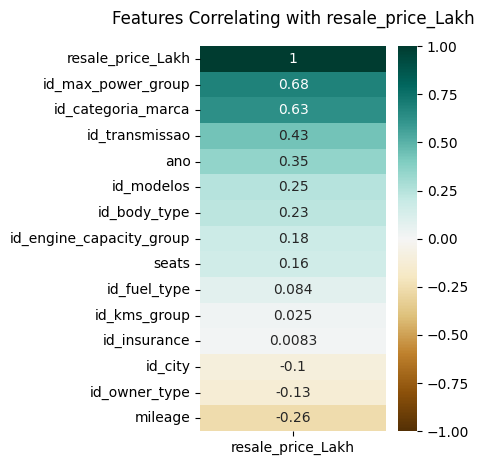

In [53]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [54]:
#Export
#Not the target
colunas_selecionadas = ['body_type','id_categoria_marca','ano', 'mileage','id_max_power_group', 'id_transmissao', 'id_modelos','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Acenario2Coluna_0_20.csv', index=False)

In [55]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_categoria_marca','ano','max_power','max_power_group','id_max_power_group','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenario2_0_20.csv', index=False)

In [56]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'mileage': float,
    'id_fuel_type': float,
    'id_categoria_marca': float,
    'id_engine_capacity_group': float,
    'id_kms_group': float,
    'id_max_power_group': float,
    'id_owner_type': float,
    'id_insurance': float,
    'id_city': float,
    'id_modelos': float,
    'id_body_type': float,
    'id_transmissao': float,

})

In [57]:
#Export
#Not the target
colunas_selecionadas = ['mileage','id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_categoria_marca','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','engine_capacity_group','id_engine_capacity_group','fuel_type','id_fuel_type','kms_driven','kms_group','id_kms_group','max_power','max_power_group','id_max_power_group','owner_type','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenario2.csv', index=False)

In [58]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_categoria_marca','ano','id_city','id_insurance','seats','mileage','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('LMSXcenario2.csv', index=False)
   

In [59]:
#Export
#Not the target
colunas_selecionadas = ['id_categoria_marca','ano','mileage','id_transmissao','id_max_power_group','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('rafaCenario4.csv', index=False)

In [60]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)


Data type by column:
full_name                           object
registered_year                     object
engine_capacity                    float64
insurance                           object
transmission_type                   object
kms_driven                         float64
owner_type                          object
fuel_type                           object
max_power                          float64
seats                              float64
mileage                            float64
body_type                   string[python]
city                                object
resale_price_Lakh                   object
ano                                float64
marca                       string[python]
modelo                      string[python]
max_power_group                   category
kms_group                         category
engine_capacity_group             category
categoria_marca                   category
id_fuel_type                       float64
id_categoria_marca               

In [61]:
# Lista das colunas que você quer converter para string
cols_to_convert = ['max_power_group', 'kms_group', 'engine_capacity_group', 'categoria_marca']

# Convertendo as colunas para o tipo string
df[cols_to_convert] = df[cols_to_convert].astype(str)


In [62]:
# List of columns with matching IDs
cols_to_drop = [
    'full_name',
    'registered_year'
]

# Delete columns that have matching IDs
df = df.drop(columns=cols_to_drop)

In [63]:
print(df)

       engine_capacity      insurance transmission_type  kms_driven  \
0               1199.0    Third Party            Manual     30910.0   
1               1199.0       Zero Dep            Manual     48089.0   
2               1497.0    Third Party            Manual     51000.0   
3               1956.0    Third Party         Automatic     30000.0   
4               1197.0       Zero Dep         Automatic     61113.0   
...                ...            ...               ...         ...   
13951           2199.0    Third Party         Automatic     80000.0   
13952           1197.0    Third Party            Manual     17923.0   
13953           1498.0  Comprehensive            Manual     63389.0   
13954           1248.0  Comprehensive            Manual     40000.0   
13955           1198.0  Comprehensive            Manual     33046.0   

         owner_type fuel_type  max_power  seats  mileage  body_type  ...  \
0       First Owner    Petrol       83.8    5.0    23.84  Hatchback  ..

In [64]:
print(df.columns)

Index(['engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city', 'resale_price_Lakh', 'ano', 'marca', 'modelo',
       'max_power_group', 'kms_group', 'engine_capacity_group',
       'categoria_marca', 'id_fuel_type', 'id_categoria_marca',
       'id_engine_capacity_group', 'id_kms_group', 'id_max_power_group',
       'id_owner_type', 'id_insurance', 'id_city', 'id_modelos',
       'id_body_type', 'id_transmissao', 'id_price', 'id_ano', 'id_seats',
       'id_mileage'],
      dtype='object')
